# Generate and Save Random Timeseries Data to CSV and Excel Files
The data has 300 rows and 2 columns:

Time Index: An integer time index that's not evenly sampled.
Value: Random data corresponding to each time index.

In [1]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Generate 300 unique, sorted, but unevenly spaced time indices
time_indices = np.sort(np.random.choice(range(1000), size=300, replace=False))

# Generate random data values
data_values = np.random.randn(300)

# Create a DataFrame
df = pd.DataFrame({
    'Time': time_indices,
    'Value': data_values
})

# Save to CSV file
df.to_csv('random_data.csv', index=False)

# Save to Excel file
df.to_excel('random_data.xlsx', index=False)


# The Following Content Shows how to Read in Data and Interpolate

# Step 1: Read in The Data

In [2]:
# Read from CSV file
df = pd.read_csv('random_data.csv')

# Read from Excel file
# df = pd.read_excel('random_data.xlsx')


# Step 2, Method 1: Convert DataFrame to ndarray and Perform Interpolation and Plot. 

This is a way very similar to MATLAB, as ndarray is like the matrix in MATLAB


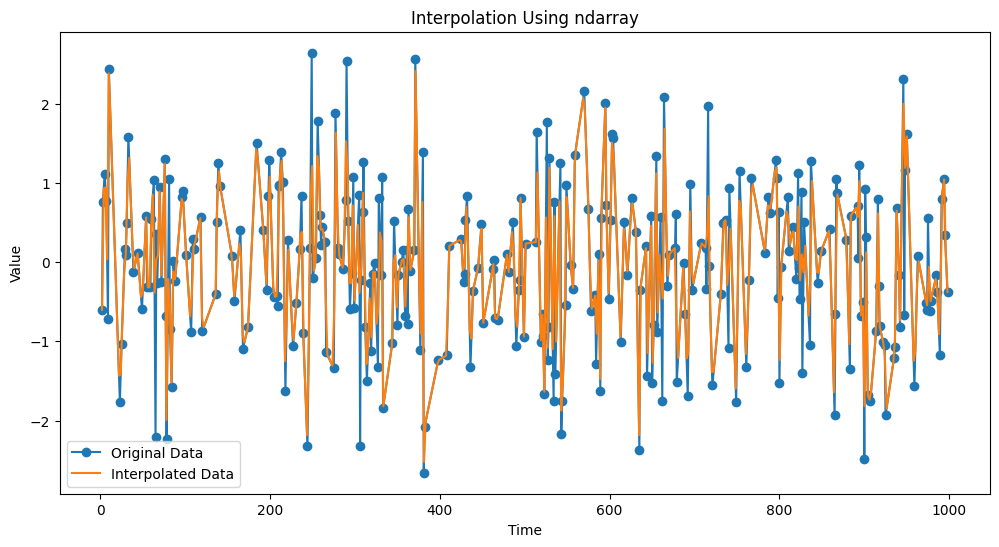

In [9]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Convert DataFrame columns to NumPy arrays
time_array = df['Time'].to_numpy()
value_array = df['Value'].to_numpy()

# Create new evenly spaced time indices, with fixed number of points
new_time_array = np.linspace(time_array.min(), time_array.max(), num=500)


# ######################
# # Alternatively, you can specify the desired step length
# # Define the desired step length
# step_length = 1.0  # You can change this value to any desired step length

# # Create new evenly spaced time indices using np.arange
# new_time_array = np.arange(time_array.min(), time_array.max() + step_length, step=step_length)
# ######################

# Interpolate using linear interpolation
interp_function_array = interp1d(time_array, value_array, kind='linear')
new_value_array = interp_function_array(new_time_array)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(time_array, value_array, '-o', label='Original Data')
plt.plot(new_time_array, new_value_array, '-', label='Interpolated Data')
plt.title('Interpolation Using ndarray')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


# Step 2, Method 2: Interpolate Data and Plot Using DataFrame

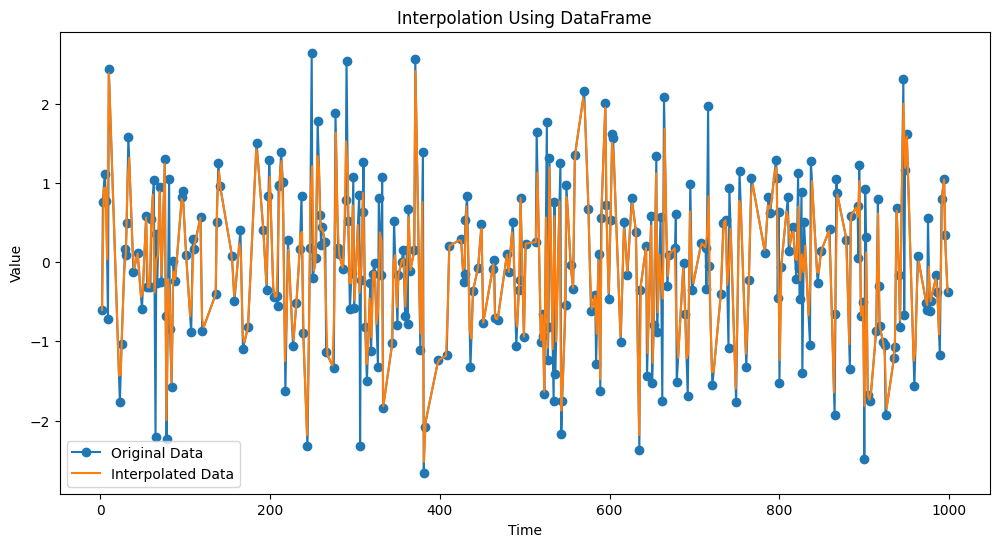

In [6]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Extract 'Time' and 'Value' columns
time = df['Time']
value = df['Value']

# Create new evenly spaced time indices
new_time = np.linspace(time.min(), time.max(), num=500)  # 500 points

# Interpolate using linear interpolation
interp_function = interp1d(time, value, kind='linear')
new_value = interp_function(new_time)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(time, value, '-o', label='Original Data')
plt.plot(new_time, new_value, '-', label='Interpolated Data')
plt.title('Interpolation Using DataFrame')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
